<a href="https://colab.research.google.com/github/partizanos/computational_finance/blob/master/finance_TP_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Series 10 --The Greeks

## Exercise 1
Like in the series 9, 
Let an asset S be valuated at t = 0. 
Let be a put option having maturity
- T = 1
- strike price K = 120. 
- volatility is assumed to be constant (σ = 20%) over the lifespan of the put; 
- the risk-free rate is r = 5%; 


###  Exercise 1.1
Using the Black-Scholes formula to valuate the put price:

-Plot the evolution of the put price as a function of the initial assert price S0.


Text(0.5, 1.0, 'X axis: S0 prices 1-300, Y axis: "value of the Put option ')

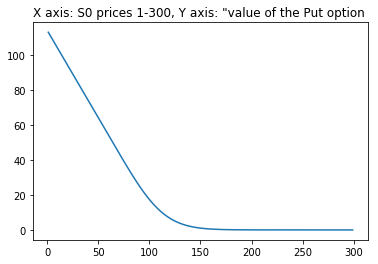

In [0]:
import numpy as np
import scipy.stats as si
import matplotlib.pyplot as plt 
import math

def Black_Scholes_Algo_Put(S, K, T, r, sigma):    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    put = (K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * si.norm.cdf(-d1, 0.0, 1.0))
    return put

K, T, r, sigma = 120, 1, 0.05, 0.2
s0 = [p for p in range(1,300)]
price = [Black_Scholes_Algo_Put(S, K, T, r, sigma) for S in s0]

# plt.xlabel("S0 prices 1-300")
# plt.ylabel("value of the Put option")
plt.plot(s0, price)
plt.title('X axis: S0 prices 1-300, Y axis: "value of the Put option ')

###  Exercise 1.2

-Plot the ∆ for this put.


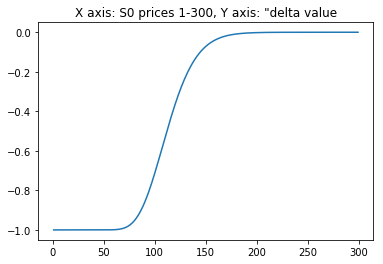

In [0]:
def get_d1(s, k, r, sigma, t):
   return ( math.log(s/k) + ( r + (sigma**2)/2 ) * t ) / ( sigma * np.sqrt(t) )

def get_price_delta(s, k, r, sigma, t):
        d1 =  get_d1(s, k, r, sigma, t)
        d2 = d1 - sigma * np.sqrt(t)
        delta = si.norm.cdf(d1) -1 
        # delta + k * np.e**(-r*t) * si.norm.cdf(-d2) 
        return delta
        
deltas = [get_price_delta(S, K, r, sigma, T) for S in s0]
plt.plot(s0, deltas)
plt.title('X axis: S0 prices 1-300, Y axis: "delta value')
plt.show()

###  Exercise 1.3

Plot the Γ for this put.


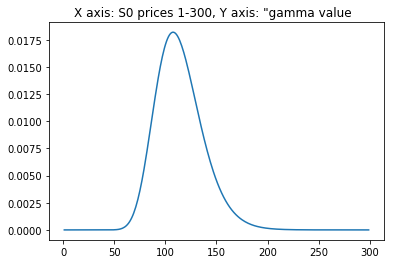

In [0]:
def get_phi(d1):
  phi = np.e**(-(d1**2)/2) / math.sqrt(2* np.pi)
  return phi

def get_gamma(S, K, r, sigma, T):
  d1 = get_d1(S, K, r, sigma, T)
  phi = get_phi(d1) 
  gamma = phi / (S* sigma * np.sqrt(T))
  return gamma

deltas = [get_gamma(S, K, r, sigma, T) for S in s0]
plt.plot(s0, deltas)
plt.title('X axis: S0 prices 1-300, Y axis: "gamma value  ')
plt.show()

## Exercise 1.4  Comment the graphs:

- Put option graph

Put option gives the right to sell the underslying at the strke price.
This entails that for prices below strike price the owner of the option will sell in higher price and thus make profit. This can be seen in the the graph too since after 120 we see 0 profit for the owner of the option and the further we are from 120 the more potential profit there is.

- delta graph:

Delta graph is a derivative of on the option price. This means that it is subject to its changes. The delta is a ratio comparing the change in the price of an underlying asset  to the corresponding change in the price of its derivative. This is also visible in our case since as long as the value of option is dropping in a steady rate the delta is -1 and then it is changing until it arrives to 0.

- gamma graph: 

Gamma as a metric measures the derivative of delta . Delta change only for the spectrum of values in around 120.
Thus Gamma is forming a bell around that spectrum too indicating the acceelaration of the option value or the velocity of change of the delta if we can make this parallelization.

## Exercise 2


Suppose that the asset price is S0 = 100, and we sell 1000 puts.

### Exercise 2.1
- We want be ∆-neutralized, which position should we have?

*Answer*

We sell the right means we have 1000 Short Put contracts. 
The $\Delta$ is for 
S0 =100 ,
K strike = 120 
r = 0.05 
maturity time in T =1 is : 

- 0.71

In [67]:
("value of delta: " , get_price_delta(100, K, r, sigma, T)), ("value of short Put  ", Black_Scholes_Algo_Put(100, K, T, r, sigma)), ("how much money we got from short puts ", 1000* Black_Scholes_Algo_Put(100, K, T, r, sigma)) 

(('value of delta: ', -0.7128083620948729),
 ('value of short Put  ', 17.3950083566465),
 ('how much money we got from short puts ', 17395.0083566465))

Since the underlying stock's delta is -0.7, our current position has a delta 
$0.71 *1000 = -710 $
In other words with this position an investor would loose 710 when the price of the underlyinh increases by $\delta S $

We can buy a position with delta 710 stocks to compensate for that.



### Exercise 2.2
- Suppose $S_{0+\epsilon} = 105$, what is the payoff of this strategy?

Answer: 0 since we neutralized it.

In [81]:
(("profits of puts",
1000* ( Black_Scholes_Algo_Put(105, K, T, r, sigma) - Black_Scholes_Algo_Put(100, K, T, r, sigma) )),
("profits from stock",
 710*(105 - 100))
)

(('profits of puts', -3345.727260402114), ('profits from stock', 3550))

When the 

### Exercise 2.3
- And for $S_{0+\epsilon}$ = 95?

0 since we neutralized it 

In [80]:
(("profits of puts",
1000* (  Black_Scholes_Algo_Put(95, K, T, r, sigma) - Black_Scholes_Algo_Put(100, K, T, r, sigma) )),
("profits from stock",
 710*(95 - 100))
)

(('profits of puts', 3769.575723060839), ('profits from stock', -3550))